# Infinite Row of Vortices 

We are going to use the principle of superposition to add the effects of many vortices in a row


In [1]:
import numpy
import math
from matplotlib import pyplot
#embed figures in plot
%matplotlib inline

In [2]:
N = 20
x_start, x_end = -2.0, 2.0 
y_start, y_end = -1.0, 1.0 

x = numpy.linspace(x_start,x_end, N)
y = numpy.linspace(y_start,y_end, N)

X,Y = numpy.meshgrid(x,y)

In [13]:
#Define Number of Vortices and Strength
strength = 20.0
Num_Vortex_1 = 1000
x_start_vortex = -100.0
x_end_vortex = 100.0
#Define the coordinates of the vortices by evenly spacing them in the field of view
x_vortex = numpy.linspace(x_start_vortex,x_end_vortex,Num_Vortex_1)
y_vortex = numpy.zeros(Num_Vortex_1)
 

In [4]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Gives back the velocity of a point vortex 
    
    Parameters: 
    -----------
    strength: float, strength of the vortices 
    xv: float, x-coordinate of the vortices
    yv: float, y-coordinate of the vortices 
    X,Y : 2D Numpy arrays that will give grid points 
    Outputs:
    --------
    u = 2D numpy array, x-component of the velocity 
    v = 2D numpy array, y-component of the velocity 
    """
    u = +strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = -strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v 
    

In [5]:
# Now we can loop through all the different vortex positions 
u = numpy.zeros((Num_Vortex_1,N,N),dtype='float')
v = numpy.zeros((Num_Vortex_1,N,N),dtype='float')
for i in range(Num_Vortex_1):
    u[i,:,:], v[i,:,:]= get_velocity_vortex(strength,x_vortex[i],y_vortex[i],X,Y)


u_tot = numpy.sum(u,axis=0)
v_tot = numpy.sum(v,axis=0)


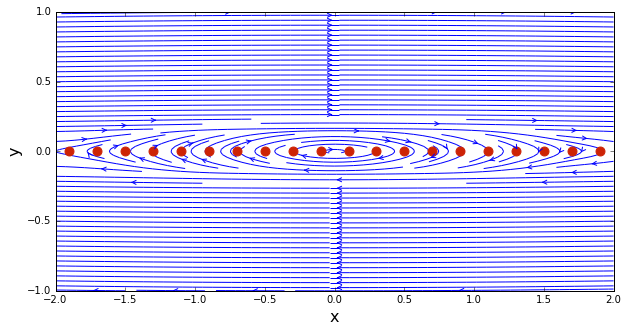

In [6]:
x_start_fig, x_end_fig = -2.0, 2.0
y_start_fig, y_end_fig = -1.0, 1.0 

#plot the streamlines 
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start_fig,x_end_fig)
pyplot.ylim(y_start_fig,y_end_fig)
pyplot.streamplot(X,Y,u_tot,v_tot, density=2, linewidth=1, arrowsize =1, arrowstyle = '->')
pyplot.scatter(x_vortex,y_vortex, color ='#CD2305', s=80, marker ='o');

In [10]:
# now calculating the infinite row of vortices 
a = 0.05

u_inf = +strength/(2*a)*(numpy.sinh(2*math.pi*Y/a)/(numpy.cosh(2*math.pi*Y/a)-numpy.cos(2*math.pi*X/a)))
v_inf = -strength/(2*a)*(numpy.sin(2*math.pi*X/a)/(numpy.cosh(2*math.pi*Y/a)-numpy.cos(2*math.pi*X/a)))

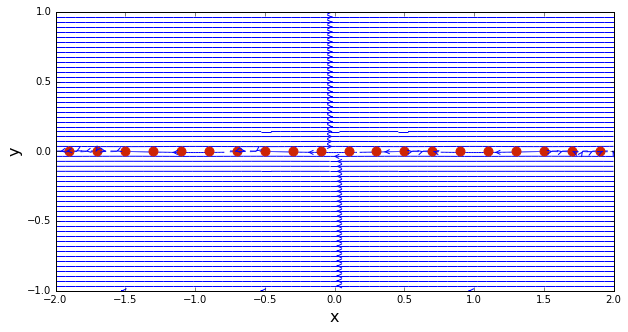

In [12]:
#plot the streamlines 
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start_fig,x_end_fig)
pyplot.ylim(y_start_fig,y_end_fig)
pyplot.streamplot(X,Y,u_inf,v_inf, density=2, linewidth=1, arrowsize =1, arrowstyle = '->')
pyplot.scatter(x_vortex,y_vortex, color ='#CD2305', s=80, marker ='o');